# data analytics for Dartpost

### undetecability for a sock account

We define the undetectability of a sock account a to be $undet(a)=1/e^{(T-D_a)}$ where T is the total time (6 days) and D_a is T if the sock is undetected or the earliest day on which a was reported to be a sock. Thus, an undetected sock would have a success rate of 1.

### undetectability for a sock creation strategy

We define the undetectability of a sock creation strategy S to be $undet(S) = \frac{\sum_{a\in Create(S)} undet(a) }{|Create(S)|}$ where Create(S) is the set of sock accounts created using strategy S.


In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams.update({
    "text.usetex": True,
    "font.size":12,
})

In [2]:
df_users = pd.read_csv("./data/users", delimiter="\t")
df_follow = pd.read_csv("./data/follow", delimiter="\t")
df_report= pd.read_csv("./data/reportusers", delimiter="\t")

print(df_users.shape)

(478, 16)


In [3]:
df_assigns = pd.concat(
    [
    pd.read_csv("./assigns/sockpuppet_assigned.csv"),
    pd.read_csv("./assigns/observer_assigned.csv"),
    pd.read_csv("./assigns/participant_assigned.csv"),
    ],
    axis=0,
)

print(df_assigns.shape)

(457, 12)


In [4]:
df_users = pd.merge(df_users, df_assigns, on=["email", "username"], how="left")

df_users[["isMod", "isObserver", "isPuppet"]] = (df_users[["isMod", "isObserver", "isPuppet"]] == "t")

df_users["isPart"] = ~df_users[["isMod", "isObserver", "isPuppet"]].any(axis=1)

print(df_users.shape)
display(df_users.head())

(478, 27)


,id,email,username,password_x,firstName,lastName,fullName,profilePic,isMod,isObserver,...,sock,topic_0,pos_0,topic_1,pos_1,topic_2,pos_2,strategy,turk_ids,isPart
0,2291,Molly_5327@observer.com,Molly_5327,$2a$10$QTEDCQ/MN/c.0S6snISLoOVxElZZd4rrumatMIA...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A3GKAXHBZFZRXU,False
1,1976,miho@dartpost.com,miho,$2a$10$9NrDj7dEYDHgK4vL0kTCbOmY07dM/ptcF2dVD8J...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,1977,ModBessler@dartpost.org,ModB,$2a$10$iyHu9zlIoZ5JW7ErGgfCvueRa3tMGPfx6GlkE//...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,2292,Luke_6520@observer.com,Luke_6520,$2a$10$FpS2QW9J/S4aMJcTiQygGuyMwT7y57XEz/0MW33...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A2NHFSO7GMM8QR,False
4,1980,dapang@dartpost.com,RuiboLiu,$2a$10$dxRTsGeeutRAWhpYOGTwwek2x2CgGxvKeEfKmqQ...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [5]:
df_posts = pd.read_csv("./data/posts_processed.csv").dropna(subset=["AuthorId"])
df_comments = pd.read_csv("./data/comments", delimiter="\t").dropna()

df_posts["AuthorId"] = df_posts["AuthorId"].astype(int)
df_comments["CommenterId"] = df_comments["CommenterId"].astype(int)
df_comments["PostId"] = df_comments["PostId"].astype(int)

display(df_posts.head())
display(df_comments.head())

,id,text,picture_url,parent_id,root_id,is_marked,tags,createdAt,updatedAt,AuthorId,is_trending
0,93,I think that we should move away from nuclear ...,NaN,NaN,NaN,False,"{nuclear,energy,enviroment}",2020-09-03 01:59:10.051+00,2020-09-04 13:08:51.133+00,2580,False
1,94,"Given the security put in place since 911, it ...",NaN,NaN,NaN,False,{TerroristAttack},2020-09-03 02:28:29.002+00,2020-09-04 13:08:51.133+00,2593,False
2,95,NaN,NaN,NaN,NaN,True,"{""""}",2020-09-03 02:31:10.028+00,2020-09-03 02:34:29.992+00,2611,False
3,96,It is crucial that the United States plays a r...,NaN,NaN,NaN,False,{Worldaffairs},2020-09-03 02:34:07.312+00,2020-09-04 13:08:51.133+00,2593,False
4,97,Strongly disapprove of a two percent annual ta...,NaN,NaN,NaN,False,{WealthTax},2020-09-03 02:36:27.825+00,2020-09-04 13:08:51.133+00,2593,False


,id,text,createdAt,updatedAt,PostId,CommenterId
0,68,California is leading the way: https://www.for...,2020-09-03 02:52:38.45+00,2020-09-03 02:52:38.459+00,97,2593
1,69,Not sure we are fully secure here. Technology ...,2020-09-03 02:54:01.828+00,2020-09-03 02:54:01.84+00,94,2719
2,79,"It makes sense, nature will still be around on...",2020-09-03 03:04:48.007+00,2020-09-03 03:04:48.02+00,105,2679
3,70,I feel like we are moving away from nuclear en...,2020-09-03 02:54:27.349+00,2020-09-03 02:54:27.362+00,93,2679
4,51,"Nuclear energy, with proper safety in place, i...",2020-09-03 02:19:56.218+00,2020-09-03 02:19:56.226+00,93,2593


## Active users

In [6]:
df_coments_rename = df_comments[["CommenterId", "createdAt"]]
df_coments_rename.columns = ["id", "time"]
df_posts_rename = df_posts[["AuthorId", "createdAt"]]
df_posts_rename.columns = ["id", "time"]

df_active_users = pd.concat([df_coments_rename, df_posts_rename], axis=0, ignore_index=True)

df_active_users["time"] = pd.to_datetime(df_active_users["time"])
df_active_agg = df_active_users.groupby("id").agg(np.ptp).rename(columns={"time": "active_range"})
df_active_agg["active_flag"] = df_active_agg["active_range"] > pd.Timedelta("1 day")

df_active_agg.reset_index()

,id,active_range,active_flag
0,1976,0 days 00:00:00,False
1,2387,4 days 03:53:45.811000,True
2,2388,4 days 05:29:10.248000,True
3,2389,3 days 19:50:41.707000,True
4,2390,3 days 20:42:14.461000,True
...,...,...,...
98,2719,5 days 00:18:09.558000,True
99,2722,3 days 12:06:17.112000,True
100,2723,0 days 00:00:33.543000,False
101,2734,2 days 19:04:04.981000,True


In [7]:
df_users_active = pd.merge(df_users, df_active_agg, how="left", left_on="id", right_on="id")

df_users_active["active_range"].fillna(pd.Timedelta("0 day"), inplace=True)
df_users_active["active_flag"].fillna(False, inplace=True)

df_users_final = df_users_active

In [70]:
print(f"{df_report.shape[0]} {df_users_final.shape[0]}")
display(df_report.head())
display(df_users_final.head(2))

46 478


,id,report,createdAt,updatedAt,ReporterId,SuspectId
0,14,They do not go into enough detail and do not d...,2020-09-03 03:24:23.636+00,2020-09-03 03:24:23.636+00,2638,2604
1,15,"His comment, “thank you China,” is inappropria...",2020-09-03 19:38:37.22+00,2020-09-03 19:38:37.22+00,2593,2560
2,16,I think it is a bot account,2020-09-03 20:21:50.501+00,2020-09-03 20:21:50.501+00,2588,2604
3,17,Possible bot,2020-09-03 20:40:12.567+00,2020-09-03 20:40:12.567+00,2588,2638
4,18,Bot?,2020-09-04 13:31:00.079+00,2020-09-04 13:31:00.079+00,2588,2658


,id,email,username,password_x,firstName,lastName,fullName,profilePic,isMod,isObserver,...,pos_0,topic_1,pos_1,topic_2,pos_2,strategy,turk_ids,isPart,active_range,active_flag
0,2291,Molly_5327@observer.com,Molly_5327,$2a$10$QTEDCQ/MN/c.0S6snISLoOVxElZZd4rrumatMIA...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,A3GKAXHBZFZRXU,False,0 days,False
1,1976,miho@dartpost.com,miho,$2a$10$9NrDj7dEYDHgK4vL0kTCbOmY07dM/ptcF2dVD8J...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0 days,False


In [9]:
stop_time = pd.to_datetime("2020-09-08 23:59:59+00")
day_timedelta = pd.Timedelta(1, "day")
total_timedelta = pd.Timedelta(1, "day")

### Activity

In [13]:
act_post = df_posts.groupby("AuthorId").size()
act_comment = df_comments.groupby("CommenterId").size()

In [14]:
df_act = pd.concat([act_post, act_comment], keys=["PostNum", "ComNum"], axis=1, join="outer").fillna(0)
df_act["TotalAct"] = df_act["PostNum"] + df_act["ComNum"]
print(df_act.shape)
display(df_act.head())

(103, 3)


,PostNum,ComNum,TotalAct
1976,1.0,0.0,1.0
2387,19.0,19.0,38.0
2388,15.0,14.0,29.0
2389,15.0,16.0,31.0
2390,7.0,45.0,52.0


In [15]:
df_users_final = pd.merge(df_users_final, df_act, left_on=["id"], right_index=True, how="left")
display(df_users_final.head())

,id,email,username,password_x,firstName,lastName,fullName,profilePic,isMod,isObserver,...,topic_2,pos_2,strategy,turk_ids,isPart,active_range,active_flag,PostNum,ComNum,TotalAct
0,2291,Molly_5327@observer.com,Molly_5327,$2a$10$QTEDCQ/MN/c.0S6snISLoOVxElZZd4rrumatMIA...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,False,True,...,NaN,NaN,NaN,A3GKAXHBZFZRXU,False,0 days,False,NaN,NaN,NaN
1,1976,miho@dartpost.com,miho,$2a$10$9NrDj7dEYDHgK4vL0kTCbOmY07dM/ptcF2dVD8J...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,True,False,...,NaN,NaN,NaN,NaN,False,0 days,False,1.0,0.0,1.0
2,1977,ModBessler@dartpost.org,ModB,$2a$10$iyHu9zlIoZ5JW7ErGgfCvueRa3tMGPfx6GlkE//...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,True,False,...,NaN,NaN,NaN,NaN,False,0 days,False,NaN,NaN,NaN
3,2292,Luke_6520@observer.com,Luke_6520,$2a$10$FpS2QW9J/S4aMJcTiQygGuyMwT7y57XEz/0MW33...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,False,True,...,NaN,NaN,NaN,A2NHFSO7GMM8QR,False,0 days,False,NaN,NaN,NaN
4,1980,dapang@dartpost.com,RuiboLiu,$2a$10$dxRTsGeeutRAWhpYOGTwwek2x2CgGxvKeEfKmqQ...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,True,False,...,NaN,NaN,NaN,NaN,False,0 days,False,NaN,NaN,NaN


In [16]:
df_users_act = df_users_final[["id", "isPart", "isPuppet", "strategy", "active_flag", "PostNum", "ComNum", "TotalAct"]]

display(df_users_act)

,id,isPart,isPuppet,strategy,active_flag,PostNum,ComNum,TotalAct
0,2291,False,False,NaN,False,NaN,NaN,NaN
1,1976,False,False,NaN,False,1.0,0.0,1.0
2,1977,False,False,NaN,False,NaN,NaN,NaN
3,2292,False,False,NaN,False,NaN,NaN,NaN
4,1980,False,False,NaN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
473,2407,False,True,COVERT,False,2.0,0.0,2.0
474,2704,True,False,NaN,True,26.0,27.0,53.0
475,2575,True,False,NaN,True,20.0,39.0,59.0
476,2540,False,True,COVERT,True,8.0,12.0,20.0


In [26]:
df_all_index = df_users_act["isPart"] | df_users_act["isPuppet"]

df_active_index = df_all_index & df_users_act["active_flag"]

In [51]:
df_users_act.groupby("active_flag").sum()

,id,isPart,isPuppet,PostNum,ComNum,TotalAct
active_flag,,,,,,
False,1022953,119,184,162.0,50.0,212.0
True,173238,41,26,908.0,1563.0,2471.0


In [48]:
display(df_users_act[df_all_index].groupby("active_flag").size())
# df_users_act[df_all_index].groupby("active_flag").size().rename(index={True: "Yes", False: "No"}).plot(kind="bar", rot=0, xlabel="Active or not")

active_flag
False    303
True      67
dtype: int64

<AxesSubplot:xlabel='Is account a sockpuppet?', ylabel='Number of activities'>

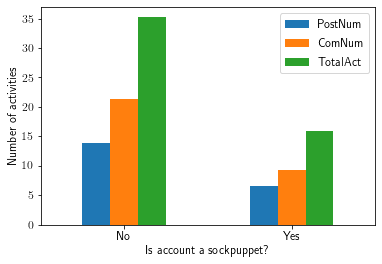

In [35]:
df_users_act[df_all_index][["isPuppet", "PostNum", "ComNum", "TotalAct"]].groupby("isPuppet").mean().rename(index={True: "Yes", False: "No"}).plot(kind="bar", rot=0, xlabel="Is account a sockpuppet?", ylabel="Number of activities", stacked=False)

<AxesSubplot:xlabel='Is account a sockpuppet?', ylabel='Number of activities'>

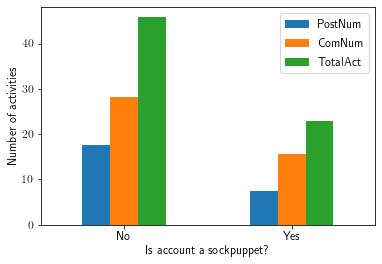

In [36]:
df_users_act[df_active_index][["isPuppet", "PostNum", "ComNum", "TotalAct"]].groupby("isPuppet").mean().rename(index={True: "Yes", False: "No"}).plot(kind="bar", rot=0, xlabel="Is account a sockpuppet?", ylabel="Number of activities", stacked=False)

<AxesSubplot:xlabel='Strategies for sockpuppets', ylabel='Number of activities'>

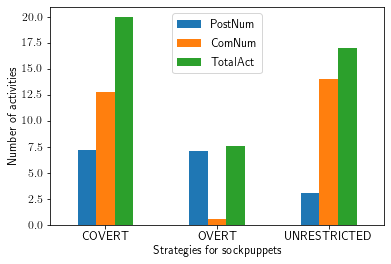

In [52]:
df_users_act[df_all_index][["strategy", "PostNum", "ComNum", "TotalAct"]].groupby("strategy").mean().plot(kind="bar", rot=0, xlabel="Strategies for sockpuppets", ylabel="Number of activities")

<AxesSubplot:xlabel='Strategies for sockpuppets', ylabel='Number of activities'>

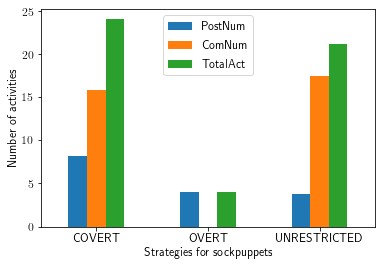

In [53]:
df_users_act[df_active_index][["strategy", "PostNum", "ComNum", "TotalAct"]].groupby("strategy").mean().plot(kind="bar", rot=0, xlabel="Strategies for sockpuppets", ylabel="Number of activities")

## influence

In [59]:
topic_polarity = {}

for t, p in zip(df_users_final["topic_1"], df_users_final["pos_1"]):
    if t not in topic_polarity:
        topic_polarity[t] = set([p])
    else:
        topic_polarity[t] |= set([p])

for t, p in zip(df_users_final["topic_2"], df_users_final["pos_2"]):
    if t not in topic_polarity:
        topic_polarity[t] = set([p])
    else:
        topic_polarity[t] |= set([p])

print(topic_polarity)

{nan: {nan}, 'How likely is it that the Dow Jones will end the year 2020 down at least 20% from its peak in February 2020?': {'No', 'Yes'}, 'How strongly would you approve or disapprove of a two percent annual tax on households whose net worth (including income, real estate, stocks and other investments) is more than 50 million?': {'Strongly approve', 'Strongly disapprove'}, 'How strongly do you favor or oppose the use of nuclear energy as one of the ways to provide electricity for the United States?': {'Strongly favor', 'Strongly oppose'}, 'How likely is it that the United States experience a terrorist attack in the next ten years that will kill more than 1000 American civilians?': {'Very unlikely', 'Very likely'}, 'How should the United States balance protection of the environment and economy growth?,Protection of the environment should be given priority': {' even at the risk of curbing economic growth."', 'Economic growth should be given priority, even if the environment suffers to 

In [56]:
dict_followby = {}
for u1, u2 in zip(df_follow["FollowerId"], df_follow["FollowingId"]):
    if u2 not in dict_followby:
        dict_followby[u2] = set()
    dict_followby[u2] |= set([u1])

In [54]:
df_users_inf = df_users_final[["id", "isPuppet", "isPart", "strategy", "PostNum", "ComNum", "TotalAct"]]

display(df_users_inf)

,id,isPuppet,isPart,strategy,PostNum,ComNum,TotalAct
0,2291,False,False,NaN,NaN,NaN,NaN
1,1976,False,False,NaN,1.0,0.0,1.0
2,1977,False,False,NaN,NaN,NaN,NaN
3,2292,False,False,NaN,NaN,NaN,NaN
4,1980,False,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
473,2407,True,False,COVERT,2.0,0.0,2.0
474,2704,False,True,NaN,26.0,27.0,53.0
475,2575,False,True,NaN,20.0,39.0,59.0
476,2540,True,False,COVERT,8.0,12.0,20.0


In [60]:
dict_u_act = dict(zip(df_users_inf["id"], df_users_inf["TotalAct"].fillna(0)))

dict_u_inf_on = {u: {"inf": sum([dict_u_act[u2] for u2 in dict_followby[u]]) if u in dict_followby else 0} for u in dict_u_act}

df_users_inf = df_users_inf.merge(pd.DataFrame.from_dict(dict_u_inf_on, orient="index"), left_on="id", right_index=True)

In [61]:
df_users_inf["AdjInf"] = (df_users_inf["TotalAct"] / df_users_inf["inf"]).replace(np.inf, 1).replace(np.nan, 0)

df_users_inf

,id,isPuppet,isPart,strategy,PostNum,ComNum,TotalAct,inf,AdjInf
0,2291,False,False,NaN,NaN,NaN,NaN,0.0,0.000000
1,1976,False,False,NaN,1.0,0.0,1.0,0.0,1.000000
2,1977,False,False,NaN,NaN,NaN,NaN,0.0,0.000000
3,2292,False,False,NaN,NaN,NaN,NaN,0.0,0.000000
4,1980,False,False,NaN,NaN,NaN,NaN,158.0,0.000000
...,...,...,...,...,...,...,...,...,...
473,2407,True,False,COVERT,2.0,0.0,2.0,0.0,1.000000
474,2704,False,True,NaN,26.0,27.0,53.0,89.0,0.595506
475,2575,False,True,NaN,20.0,39.0,59.0,155.0,0.380645
476,2540,True,False,COVERT,8.0,12.0,20.0,105.0,0.190476


<AxesSubplot:xlabel='Is account a sockpuppet?', ylabel='Follower activities'>

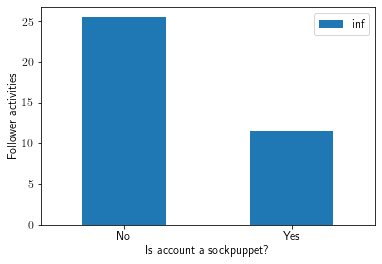

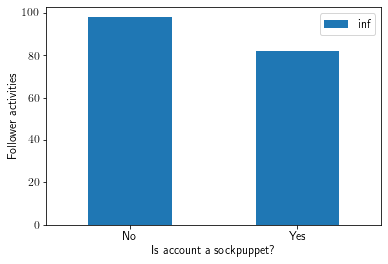

In [66]:
df_users_inf[df_all_index][["isPuppet", "inf"]].groupby("isPuppet").mean().rename(index={True: "Yes", False: "No"}).plot(kind="bar", rot=0, xlabel="Is account a sockpuppet?", ylabel="Follower activities")

df_users_inf[df_active_index][["isPuppet", "inf"]].groupby("isPuppet").mean().rename(index={True: "Yes", False: "No"}).plot(kind="bar", rot=0, xlabel="Is account a sockpuppet?", ylabel="Follower activities")

<AxesSubplot:xlabel='Strategy for sockpuppet', ylabel='Follower activities'>

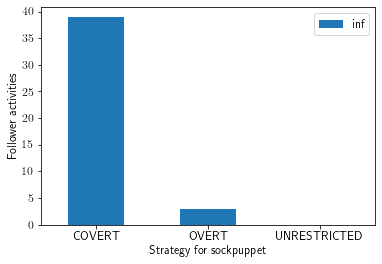

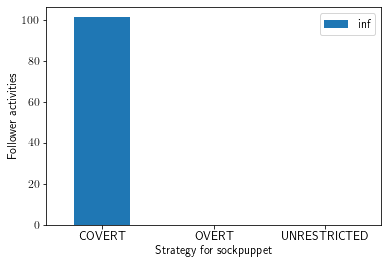

In [64]:
df_users_inf[df_all_index][["strategy", "inf"]].groupby("strategy").mean().plot(kind="bar", rot=0, xlabel="Strategy for sockpuppet", ylabel="Follower activities")

df_users_inf[df_active_index][["strategy", "inf"]].groupby("strategy").mean().plot(kind="bar", rot=0, xlabel="Strategy for sockpuppet", ylabel="Follower activities")

<AxesSubplot:xlabel='Is account a sockpuppet?', ylabel='Direct Influence'>

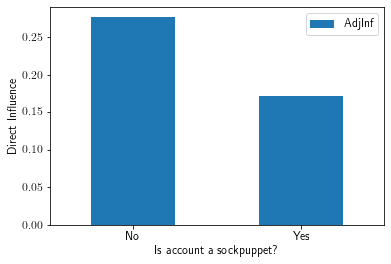

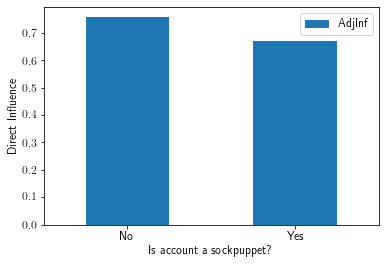

In [67]:
df_users_inf[df_all_index].replace(np.inf, np.nan)[["isPuppet", "AdjInf"]].groupby("isPuppet").mean().rename(index={True: "Yes", False: "No"}).plot(kind="bar", rot=0, xlabel="Is account a sockpuppet?", ylabel="Direct Influence")

df_users_inf[df_active_index].replace(np.inf, np.nan)[["isPuppet", "AdjInf"]].groupby("isPuppet").mean().rename(index={True: "Yes", False: "No"}).plot(kind="bar", rot=0, xlabel="Is account a sockpuppet?", ylabel="Direct Influence")

<AxesSubplot:xlabel='Strategy for sockpuppet', ylabel='Direct Influence'>

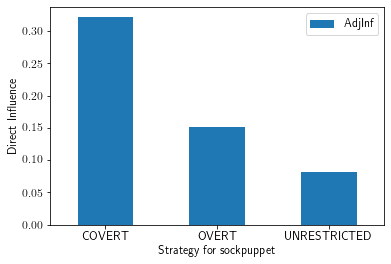

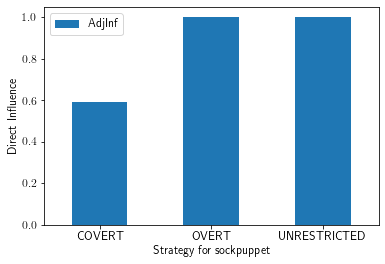

In [68]:
df_users_inf[df_all_index].replace(np.inf, 1)[["strategy", "AdjInf"]].groupby("strategy").mean().plot(kind="bar", rot=0, xlabel="Strategy for sockpuppet", ylabel="Direct Influence")

df_users_inf[df_active_index].replace(np.inf, 1)[["strategy", "AdjInf"]].groupby("strategy").mean().plot(kind="bar", rot=0, xlabel="Strategy for sockpuppet", ylabel="Direct Influence")

### process reports

In [10]:
report_clean = df_report[["SuspectId", "createdAt"]].groupby("SuspectId").min().reset_index()
report_clean["ReportToLast"] = (pd.to_datetime(report_clean["createdAt"]) - stop_time) / day_timedelta
report_clean = report_clean[["SuspectId", "ReportToLast"]]

In [12]:
df_puppet = df_users_final[df_users_final["isPuppet"]]

df_puppet = pd.merge(df_puppet, report_clean, left_on="id", right_on="SuspectId", how="left").drop("SuspectId", axis=1)

print(df_puppet.shape)
display(df_puppet.head(1))

(210, 30)


,id,email,username,password_x,firstName,lastName,fullName,profilePic,isMod,isObserver,...,topic_1,pos_1,topic_2,pos_2,strategy,turk_ids,isPart,active_range,active_flag,ReportToLast
0,2361,Connor_6191@sockpuppet.com,Connor_6191,$2a$10$bYgxFkelOI/Dh7FT3VueauwjLduc7NuLBCYMwAt...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,False,False,...,How likely is it that the Dow Jones will end t...,Yes,How strongly would you approve or disapprove o...,Strongly disapprove,UNRESTRICTED,AVMBUHD8M055F,False,0 days,False,NaN


### study who is reporting

<AxesSubplot:xlabel='Account kind', ylabel='Number of reports'>

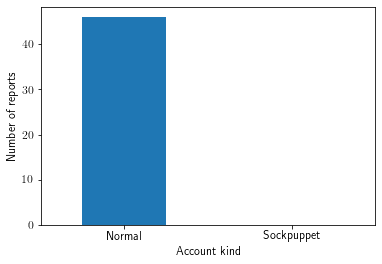

In [131]:
df_reporter = df_users_final.set_index("id").loc[df_report["ReporterId"].values.tolist()]

df_reporter[["isPart", "isPuppet"]].sum().rename(index={"isPart": "Normal", "isPuppet": "Sockpuppet"}).plot(kind="bar", rot=0, xlabel="Account kind", ylabel="Number of reports")

# df_reporter[["active_flag"]].groupby("active_flag").size().plot(kind="bar", xlabel="Active or not")

In [151]:
def find_topic_relation(x, y):
    r1 = df_users_final.set_index("id").loc[x]
    r2 = df_users_final.set_index("id").loc[y]

    t1 = r1[["topic_0", "topic_1", "topic_2"]].tolist()
    a1 = r1[["pos_0", "pos_1", "pos_2"]].tolist()

    t2 = r2[["topic_0", "topic_1", "topic_2"]].tolist()
    a2 = r2[["pos_0", "pos_1", "pos_2"]].tolist()

    ta1 = zip(t1, a1)
    ta2 = zip(t2, a2)

    topic_cnt = 0
    pos_cnt = 0
    opp_cnt = 0

    for t1, a1 in ta1:
        for t2, a2 in ta2:
            if t1 == t2:
                topic_cnt += 1
                if a1 == a2:
                    pos_cnt += 1
                else:
                    opp_cnt += 1
    ret_dict = {
#         "Topic": topic_cnt,
        "Friend": pos_cnt,
        "Rival": opp_cnt,
        "Neutral": not topic_cnt,
    }
    return ret_dict

<AxesSubplot:xlabel='Relationship', ylabel='Number of reports'>

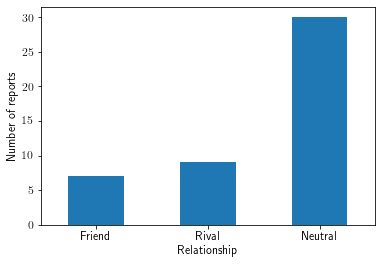

In [156]:
df_rival = pd.DataFrame([find_topic_relation(x, y) for x, y in df_report[["ReporterId", "SuspectId"]].values])

df_rival = (df_rival > 0)

df_rival.sum().plot(kind="bar", rot=0, xlabel="Relationship", ylabel="Number of reports")

In [163]:
df_report_final = pd.concat([df_report, df_rival], axis=1)

display(df_report_final.head(2))

,id,report,createdAt,updatedAt,ReporterId,SuspectId,Friend,Rival,Neutral
0,14,They do not go into enough detail and do not d...,2020-09-03 03:24:23.636+00,2020-09-03 03:24:23.636+00,2638,2604,False,False,True
1,15,"His comment, “thank you China,” is inappropria...",2020-09-03 19:38:37.22+00,2020-09-03 19:38:37.22+00,2593,2560,False,False,True


<AxesSubplot:xlabel='Active or not', ylabel='Number of reports'>

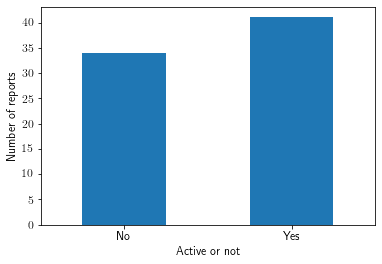

In [175]:
df_suspect = df_users_final.set_index("id").loc[df_report["SuspectId"].values.tolist()]

df_suspect[["isPart", "isPuppet"]].sum().rename(index={"isPart": "Normal", "isPuppet": "Sockpuppet"}).plot(kind="bar", rot=0, xlabel="Account kind", ylabel="Number of reports")

df_suspect[["active_flag"]].groupby("active_flag").size().rename(index={True: "Yes", False: "No"}).plot(kind="bar", xlabel="Active or not", rot=0, ylabel="Number of reports")

In [176]:
df_suspect_final = pd.concat([df_suspect.reset_index(), df_report_final], axis=1)

<AxesSubplot:xlabel='Relationship', ylabel='Number of reports'>

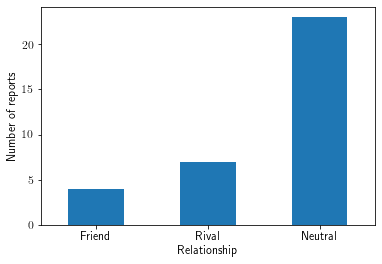

In [179]:
df_suspect_final[~df_suspect_final["isPuppet"]][["Friend", "Rival", "Neutral"]].sum().plot(kind="bar", rot=0, xlabel="Relationship", ylabel="Number of reports")

<AxesSubplot:xlabel='Relationship', ylabel='Number of reports'>

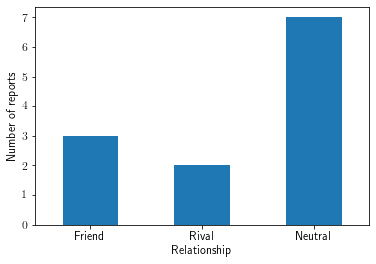

In [178]:
# df_suspect_final[["isPuppet"]].groupby("isPuppet").size().rename(index={True: "Yes", False: "No"}).plot(kind="bar", rot=0, xlabel="Is account a sockpuppet?", ylabel="Follower activities")

df_suspect_final[df_suspect_final["isPuppet"]][["Friend", "Rival", "Neutral"]].sum().plot(kind="bar", rot=0, xlabel="Relationship", ylabel="Number of reports")

In [ ]:
df_posts["root_id"][~df_posts["root_id"].isna()].astype(int)

In [ ]:
df_posts.tail()

In [ ]:
df_posts_puppet = df_posts[df_posts["AuthorId"].isin(df_puppet["id"].tolist())]
display(df_posts_puppet.head())

In [ ]:
print(df_comments.shape)
df_comments[df_comments["PostId"].isin(df_posts_puppet["id"].tolist())]

### Graph 1

+ x-axis: time t = 1,..,6
+ y-axis: f(t)=% of socks created by strategy S that were detected within t units of creation. 


4 curves using S = the 3 strategies provided to sock operators plus ALL (all socks, regardless of strategy)

In [ ]:
(df_puppet[~df_puppet["ReportToLast"].isna()].groupby("strategy").size()).plot(kind="bar", rot=0, ylabel="Number of discovered")

In [ ]:
(df_puppet.groupby("strategy").mean()["ReportToLast"] + 6).plot(kind="bar", rot=0, ylabel="Average days to discover")

In [ ]:
x = (df_puppet["ReportToLast"] + 6).sort_values().tolist()
y = np.arange(1, len(x) + 1)/210

x1 = (df_puppet[df_puppet["strategy"] == "COVERT"]["ReportToLast"] + 6).sort_values().tolist()
y1 = np.arange(1, len(x1) + 1)/210

x2 = (df_puppet[df_puppet["strategy"] == "OVERT"]["ReportToLast"] + 6).sort_values().tolist()
y2 = np.arange(1, len(x2) + 1)/210

x3 = (df_puppet[df_puppet["strategy"] == "UNRESTRICTED"]["ReportToLast"] + 6).sort_values().tolist()
y3 = np.arange(1, len(x3) + 1)/210

# y2 = np.arange(1, len(x) + 1)

fig_1 = plt.figure()
ax = fig_1.subplots()
# ax2 = ax.twinx()

l1, = ax.plot(x1, y1, marker="x", label="COVERT")
l2, = ax.plot(x2, y2, marker="x", label="OVERT")
l2, = ax.plot(x3, y3, marker="x", label="UNRESTRICTED")
l4, = ax.plot(x, y, marker = "x", label="ALL")
# ax2.plot(x,)

ax.set_xticks(np.arange(0, 6))
ax.set_xlabel("days")
ax.set_ylabel("Discovered Rate")
# ax2.set_ylabel("Discovered Number")
ax.legend()

fig_1.tight_layout()

### Graph 2

+ x-axis: time t = 1,..,6
+ y-axis:
    - f(t)=% of retweets of all sock posts upto time t,regardless of whether the socks where discovered or not.
    - f(t)=% of retweets of all sock posts upto time t which were not discovered by time t
    - f(t)=% of retweets of all sock posts upto time t there were never discovered.

3 curves in all

**This is not possible**

In [ ]:
# fig_1.savefig("./figures/graph1.pdf")